In [137]:
import os
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from smt.surrogate_models import QP, IDW, KRG
from smt.applications import MOE
import pandas as pd

In [138]:
clean_data = pd.read_csv(os.path.join(PATH_PROC_DATA, 'pDeltaT_clean.csv'))
features = ['d [mm]', 'f [GHz]', 'psPDtot_1 [W/m2]', 'psPDtot_4 [W/m2]']
target = 'pDeltaT [°C]'
X = clean_data[features].to_numpy()
y = clean_data[target].to_numpy()[:, np.newaxis]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2)

In [139]:
MOE.AVAILABLE_EXPERTS

['KRG', 'KPLS', 'KPLSK', 'LS', 'QP', 'RBF', 'IDW', 'RMTB', 'RMTC']

In [142]:
moe1 = MOE(n_clusters=1)
print("MOE1 enabled experts: ", moe1.enabled_experts)
moe1.set_training_values(X_train, y_train)
moe1.train()

MOE1 enabled experts:  ['KRG', 'LS', 'QP', 'KPLS', 'KPLSK', 'RBF', 'RMTC', 'RMTB', 'IDW']
Kriging 0.20183079184856048
LS 0.20572895592892296
QP 0.22639244878131906
KPLS 0.15289701261290933


/home/alk/miniconda3/envs/ursi/lib/python3.9/site-packages/smt/surrogate_models/krg_based.py:1045: UserWarning: Warning: theta0 is out the feasible bounds. A random initialisation is used instead.
  warnings.warn("Warning: theta0 is out the feasible bounds. A random initialisation is used instead.")


KPLSK 0.20183079184856048
RBF 0.7511755719694909
RMTC 1.410715691626052
RMTB 0.9854704216378607
IDW 0.3906846822012181
Best expert = KPLS


In [143]:
moe2 = MOE(smooth_recombination=False, n_clusters=3, allow=["KRG", "LS", "IDW"])
print("MOE2 enabled experts: ", moe2.enabled_experts)
moe2.set_training_values(X_train, y_train)
moe2.train()

MOE2 enabled experts:  ['KRG', 'LS', 'IDW']
Kriging 0.276123655274715
LS 0.15198211309374315
IDW 0.3930914442563529
Best expert = LS
Kriging 0.00011082423721672666
LS 0.00010467558201760353
IDW 0.0001001669048929563
Best expert = IDW
Kriging 0.002284108201893096
LS 0.0005491244264439026
IDW 0.0019254115874979315
Best expert = LS


In [147]:
y_moe1 = moe1.predict_values(X_test)
y_moe2 = moe2.predict_values(X_test)

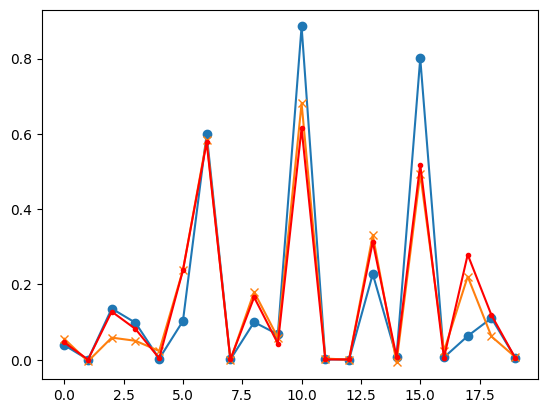

In [154]:
plt.plot(y_test, 'o-')
plt.plot(y_moe1, 'x-')
plt.plot(y_moe2, 'r.-')